In [1]:
### import libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)

In [2]:
# Load the Big Game Census and All States Census 2017 Population Estimates data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
states_population = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx")

## Are there unexpected patterns, such as players coming from states with small populations

In [3]:
# Count players from each state
state_player_counts = big_game_data.groupby('Player Birth State').size().reset_index(name='Player Count')

In [4]:
# Extract state name and 2017 population from the population dataset
states_population = states_population[['Geography Name', 'Population Estimate (as of July 1) - 2017']]
states_population.rename(columns={'Geography Name': 'State', 'Population Estimate (as of July 1) - 2017': 'Population'}, inplace=True)

In [5]:
# Merge player counts with state population data
merged_data = state_player_counts.merge(states_population, left_on='Player Birth State', right_on='State', how='left')

In [8]:
# Calculate the ratio of players to population
merged_data['Player to Population Ratio'] = merged_data['Player Count'] / merged_data['Population']

In [10]:
# Sort by the player-to-population ratio in descending order
high_ratio_states = merged_data.sort_values(by='Player to Population Ratio', ascending=False)

In [11]:
high_ratio_states[['State', 'Player Count', 'Population', 'Player to Population Ratio']].head(10)

,State,Player Count,Population,Player to Population Ratio
5,Delaware,2,961939.0,2.079134e-06
9,Hawaii,2,1427538.0,1.401013e-06
29,South Dakota,1,869666.0,1.149867e-06
18,Mississippi,3,2984100.0,1.005328e-06
20,Nevada,3,2998039.0,1.000654e-06
19,Montana,1,1050493.0,9.519340e-07
21,New Jersey,7,9005644.0,7.772903e-07
25,Ohio,9,11658609.0,7.719617e-07
15,Maryland,4,6052177.0,6.609192e-07
11,Iowa,2,3145711.0,6.357863e-07


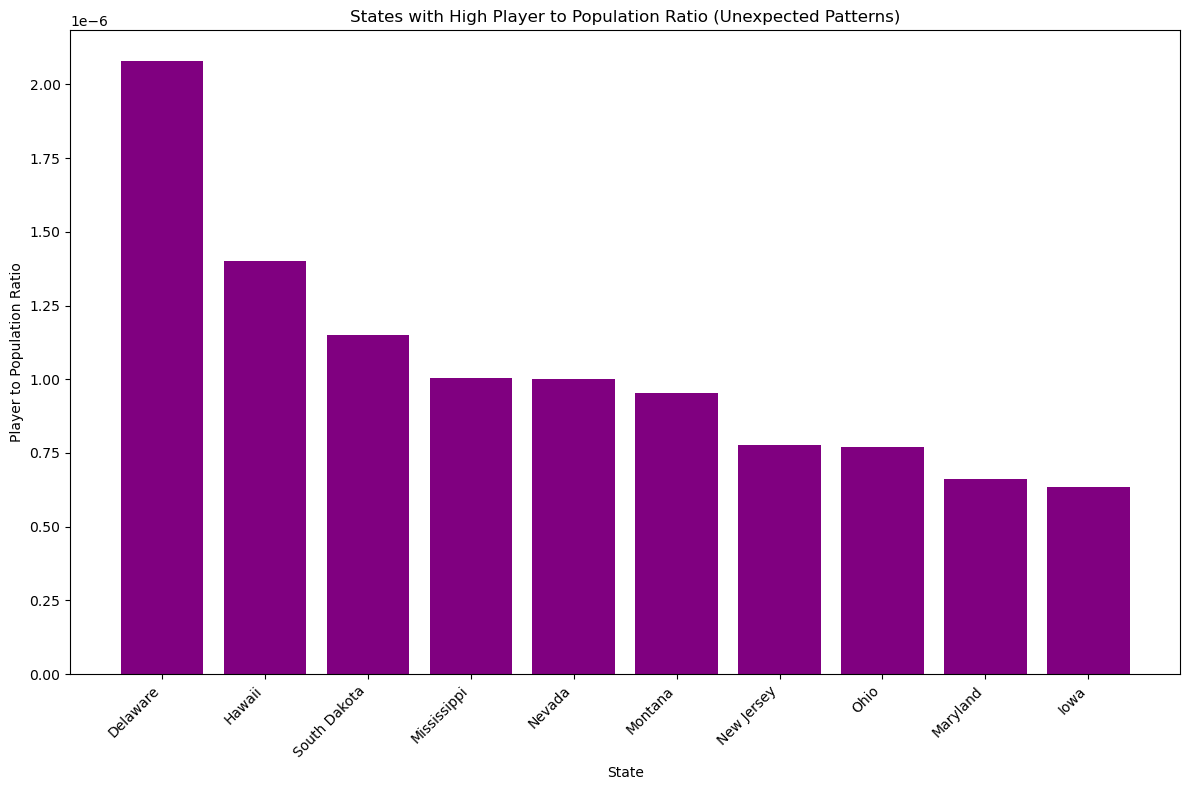

In [12]:
# Plot the player-to-population ratio for states with the highest ratios
plt.figure(figsize=(12, 8))
plt.bar(high_ratio_states['State'][:10], high_ratio_states['Player to Population Ratio'][:10], color='purple')
plt.xlabel('State')
plt.ylabel('Player to Population Ratio')
plt.title('States with High Player to Population Ratio (Unexpected Patterns)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Load the Big Game Census and All States Census 2017 Population Estimates data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
states_population = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx")

In [14]:
# Extract state name and 2017 population from the population dataset
states_population = states_population[['Geography Name', 'Population Estimate (as of July 1) - 2017']]
states_population.rename(columns={'Geography Name': 'State', 'Population Estimate (as of July 1) - 2017': 'Population'}, inplace=True)

# Find the least populous state
least_populous_state = states_population.loc[states_population['Population'].idxmin()]
print("Least populous state:", least_populous_state)

Least populous state: State         Wyoming
Population     579315
Name: 50, dtype: object


In [15]:
# Filter Big Game Census data to find players from the least populous state
least_populous_state_players = big_game_data[big_game_data['Player Birth State'] == least_populous_state['State']]
print(least_populous_state_players[['Player Name', 'Player Birth State']])

Empty DataFrame
Columns: [Player Name, Player Birth State]
Index: []


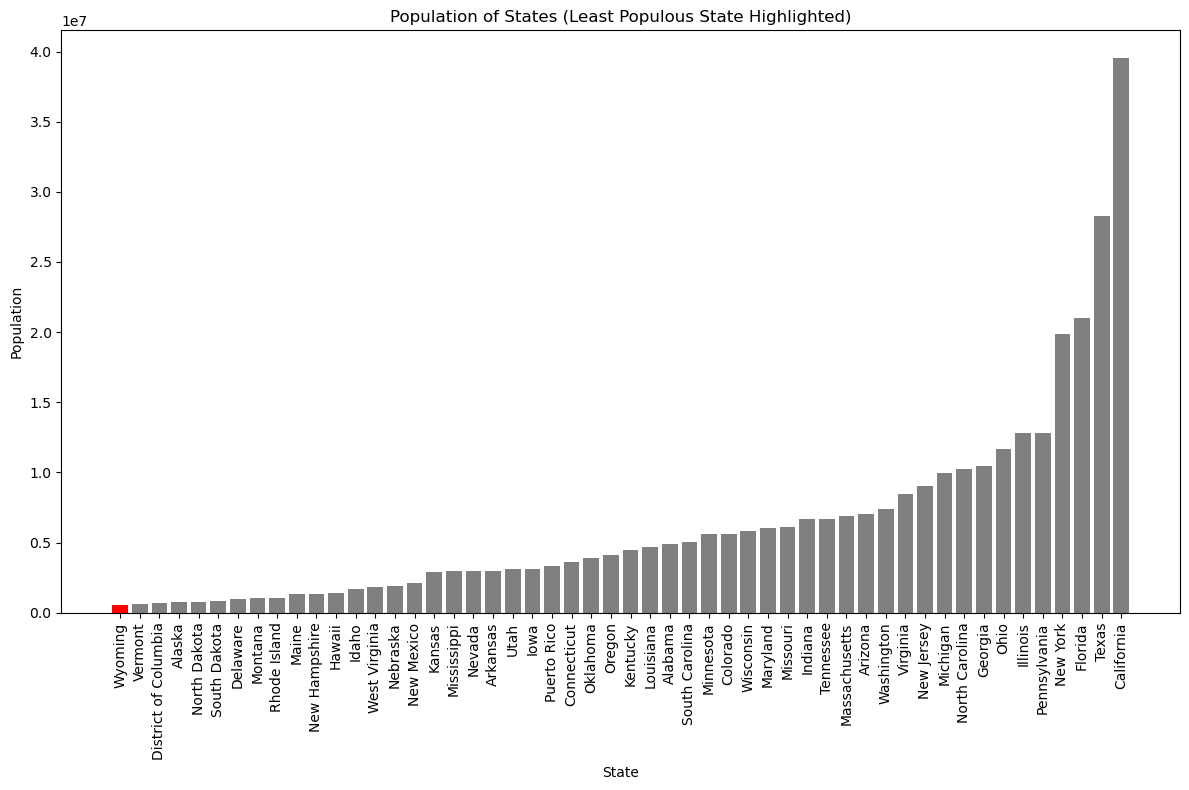

In [16]:

# Sort states by population
states_population_sorted = states_population.sort_values(by='Population', ascending=True)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(states_population_sorted['State'], states_population_sorted['Population'], color='gray')
plt.bar(least_populous_state['State'], least_populous_state['Population'], color='red')
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population of States (Least Populous State Highlighted)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()